In [1]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


#  Задача 1

Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

In [2]:
weights = [0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]

In [3]:
weights

[0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]

In [4]:
data = range(0,10,1)

time is 0.000492095947265625
[ 74. 166.  77. 127. 145. 254.  59.  12.   0.  86.]


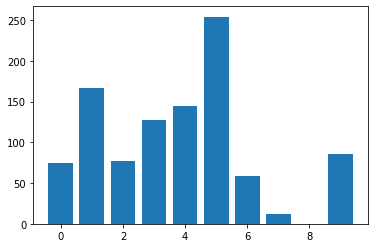

In [5]:
time_start = time.time()
data_a = random.choices(data,weights,k = 1000)
print("time is %s"%(time.time()-time_start))
a = np.zeros(10)
for i in range(0,10,1):
    a[i] = data_a.count(i)
plt.bar(data,a)
print(a)

In [6]:
data = np.array(data)
print(weights)
weights = np.array(weights)

[0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]


In [7]:
#print(weights)
#print(data[weights.argsort()])
#print(np.sort(weights))
sortd_d = data[weights.argsort()]
sortd = np.sort(weights)

time is 0.0005800724029541016
[ 50. 138.  86. 120. 150. 270.  72.  11.   0. 103.]


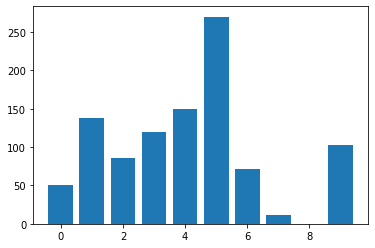

In [8]:

time_start = time.time()
data_a = random.choices(sortd_d,sortd,k = 1000)
print("time is %s"%(time.time()-time_start))
a = np.zeros(10)
for i in range(0,10,1):
    a[i] = data_a.count(i)
plt.bar(data,a)
print(a)

# Задача 2

Смоделируйте выборку размера 1000 из распределения  𝐸𝑥𝑝(𝜆) . Постройте выборочную гистограмму и точный график плотности распределения.

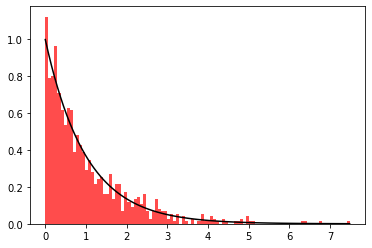

In [9]:
#Сначала построим выборку размера 1000 из равномерного распределения на [0,1]
data = np.random.uniform(0,1,1000)
#Обратная функция к экспоненциальному распределению:
data_exp = -np.log(1-data)
num_bins = 100
n, bins, patches = plt.hist(data_exp, num_bins, density = 1, color ='red', alpha = 0.7) 
y = np.exp(-bins)
plt.plot(bins, y, color = 'black')
plt.show()

# Задача 3

Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

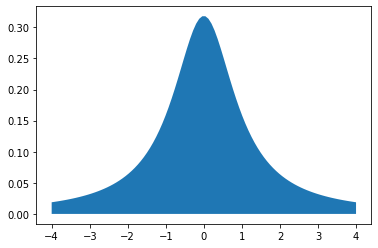

In [10]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

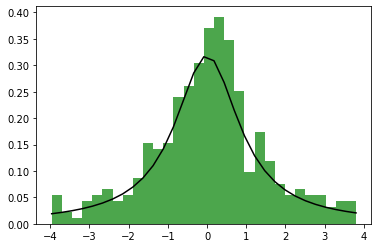

In [46]:
data_1 = np.random.uniform(-4,4,1000)
data_2 = np.random.uniform(0,0.3,1000)
data_needed = data_1[data_2 < (1/np.pi)*1/(np.power(data_1,2)+1)]
num_bins = 30
n, bins, patches = plt.hist(data_needed, num_bins, density = 1, color ='green', alpha = 0.7) 
y = (1/np.pi)*1/(np.power(bins,2)+1)
plt.plot(bins, y, color = 'black')
plt.show()



# Задача 4

Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

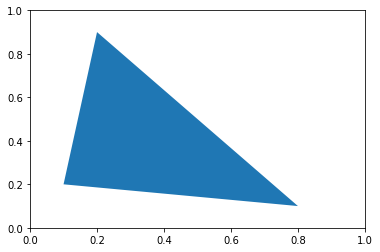

In [76]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()


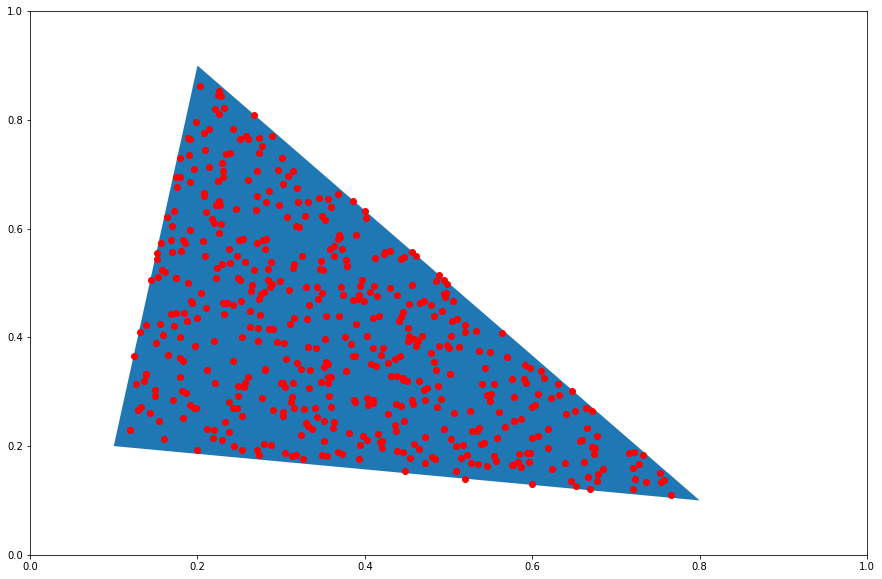

In [79]:
import math
xrand = np.array([np.random.rand() for i in range(500)])
yrand = np.array([np.random.rand() for i in range(500)])

for i in range(500):
    if yrand[i]>-xrand[i]+1:
        xrand[i]=-xrand[i]+1
        yrand[i]=-yrand[i]+1
        
xrand*=math.hypot(0.7, 0.1)
yrand*=math.hypot(0.7, 0.1)

a = math.atan2(-1, 7)
x = xrand
xrand = xrand*math.cos(a)-yrand*math.sin(a)+0.1
yrand = x*math.sin(a)+yrand*math.cos(a)+0.2

fig=plt.figure(figsize=(15,10))
polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.scatter(xrand, yrand, color='red')
plt.xlim(left=0)
plt.xlim(right=1)
plt.ylim(bottom=0)
plt.ylim(top=1)
plt.show()

# Задача 5

Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

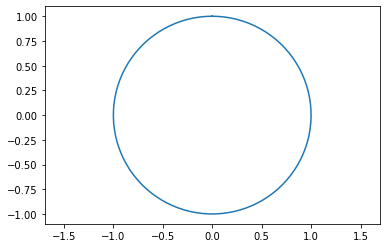

In [12]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

Воспользуемся тем, что в полярных координатах окружность это прямоугольник со соронами 1 и 2Pi.

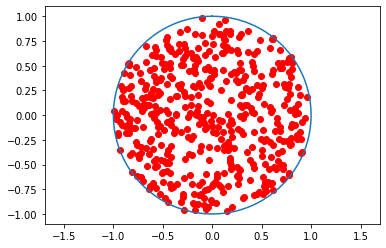

In [13]:
angle = np.random.uniform(0,2*np.pi,500)
radius = np.sqrt(np.random.uniform(0,1,500))
x = np.zeros(500)
y = np.zeros(500)
x = radius*np.cos(angle)
y = radius*np.sin(angle)
plt.scatter(x,y, color = 'red')
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')

plt.show()

# Задача 6

Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

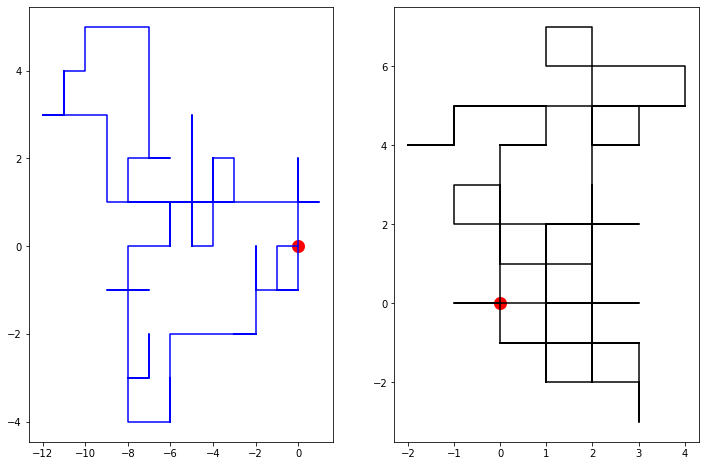

In [75]:
def random_walk(n):
    X_index = np.random.choice(np.arange(n), n//2, replace = False)
    Y_index = np.random.choice(np.arange(n), n//2, replace = False)
    X_ind = np.ones(n)
    Y_ind = np.ones(n)
    X_ind[-X_index] = -1
    Y_ind[-Y_index] = -1
    X_new = np.cumsum(X_ind)
    Y_new = np.cumsum(Y_ind)
    X = (X_new+Y_new)/2
    Y = (X_new-Y_new)/2
    return X,Y

X, Y = random_walk(100)
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(X,Y, color='blue')

plt.scatter([0], [0], color='red', lw=7)
X, Y = random_walk(100)
plt.subplot(1,2,2)
plt.plot(X,Y,color='black')

plt.scatter([0], [0], color='red', lw=7)
plt.show()

# Задача 7

Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

Несколько слов об алгоритме: если координаты Х и У имеют нормальное распределение, то величина Х^2+Y^2 будет иметь экспоненциальное распределение (как частный случай распределения хи квадрат). Экспоненциальное распределение мы строить умеем. Поэтому, мы построим экспоненциальное для r используя метод обратной функции. Тогда вернувшись в систему координат Х У мы получим две независимо распределенные нормальные величины. 

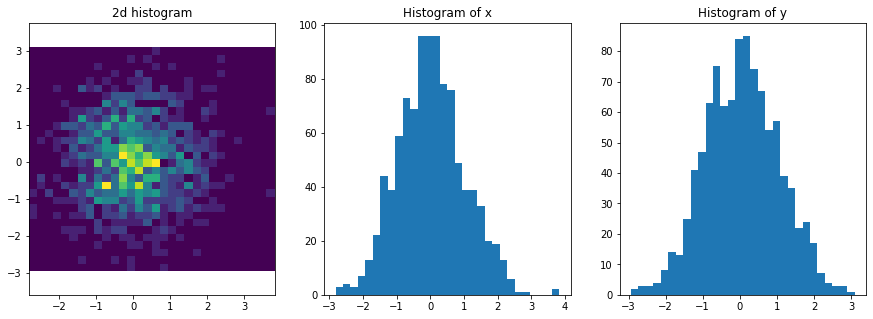

In [92]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

Запишем это преобразование без вызова функций синуса и косинуса

775


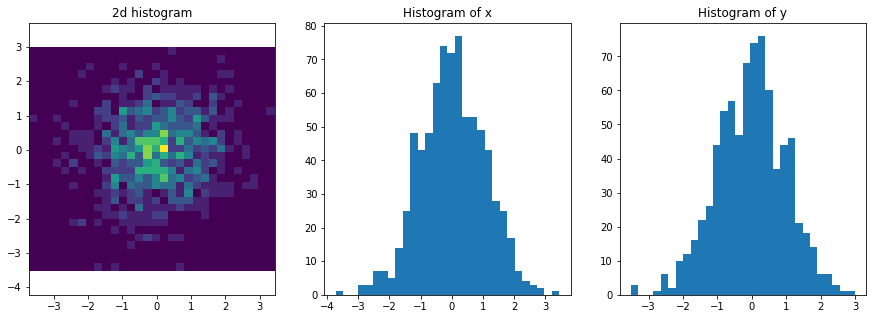

In [54]:
n = 1000
u1, u2 = 2*np.random.rand(2, n)-1
r = u1*u1+u2*u2
u1=u1[r<1]
u2=u2[r<1]
r = r[r<1]

print(len(r))
x = u1*np.sqrt((-2*np.log(r))/r)
y = u2*np.sqrt((-2*np.log(r))/r)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

Теперь "сдвинем" распределение согласно условию задачи

795


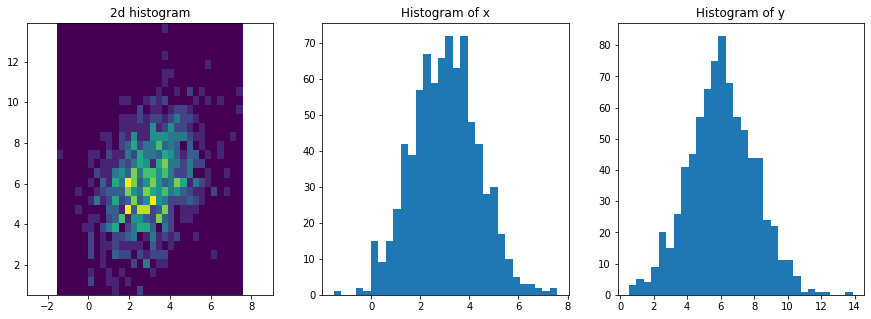

In [48]:
n = 1000
u1, u2 = 2*np.random.rand(2, n)-1
r = u1*u1+u2*u2
u1 = u1[r<1]
u2=u2[r<1]
r = r[r<1]
print(len(r))
C = np.array([[2,1],[1,4]])
d = 2
c = np.sqrt(C[1][1] - d * d)
b = C[1][0] / d
a = np.sqrt(C[0][0] - b * b)

x = u1*np.sqrt((-2*np.log(r))/r)
y = u2*np.sqrt((-2*np.log(r))/r)
X = a * x + b * y + 3
Y = c * x + d * y + 6
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(X, Y, bins=30)
ax[0].axis('equal')
ax[1].hist(X, bins=30)
ax[2].hist(Y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

# Задача 8

Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.

In [89]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])


L = np.zeros((9,9))
L[0][0] = math.sqrt(B[0][0])
for k in range(1, 9):
    L[k][0] = B[k][0] / L[0][0]
for i in range(1, 9):
    s0 = 0.0
    for p in range(i):
        s0 = s0 + L[i][p] * L[i][p]
    k0 = math.sqrt(B[i][i] - s0)
    L[i][i] = k0
    if i != 8:
        for j in range(i+1, 9):
            s1 = 0.0
            for p in range(i):
                s1 = s1 + L[i][p] * L[j][p]
            k1 = B[j][i] - s1
            if abs(L[i][i]) > 1e-15:
                L[j][i] = k1 / L[i][i]
            else:
                print(i,j, 'PROBLEM')
print('Искомая матрица L :')
print(L)
print('  Реузльтирующая матрица ковариаций после преобразования вектора с данной матрицей (полученная матрица ковариаций\n совпадает с заданной)')
F = L.dot(np.transpose(L))
print(F)

Искомая матрица L :
[[ 1.41421356  0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          2.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          2.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.         -0.5         0.          1.93649167  0.          0.
   0.          0.          0.        ]
 [-0.70710678  0.          0.          0.          1.22474487  0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          2.
   0.          0.          0.        ]
 [ 0.          0.         -0.5         0.          0.          0.
   1.93649167  0.          0.        ]
 [ 0.          0.          0.          0.          0.         -0.5
   0.          1.93649167  0.        ]
 [-0.70710678  0.          0.          0.         -1.22474487  0.
   0.          0.          0.        ]]
  Реузльтирующая матрица ковариац

# Задача 9

С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число  𝜋 . Теоретически обоснуйте необходимое число бросаний, чтобы оценить число  𝜋  с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.

Теоретическое обоснование основывается на неравенство Чебышева. Мы можем рассмотреть случайную величину Yn = X1+...+Xn, где X1...Xn - бернуллиевские случайные величины Bern(Pi/4). Эти случайные величины являются индикаторами попадания точки в круг. Дисперсия Yn есть n*p*q, где p = Pi/4, q = 1- Pi/4. Мы имеем все чтобы использовать неравенство Чебышева и оценить число бросаний n при желаемой точности 3 знака и достоверности 99%. Теоретическая точность - примерно 1.2 миллиарда бросков. На практике 10 млн дает точность до второго знака, третий немного гуляет. На 100 миллионах выдает точно (вроде)

In [110]:
tries = 100000000
frst = np.random.uniform(0,1,tries)
second = np.random.uniform(0,1,tries)
counter = 0

for i in range(0,tries,1):
    if (frst[i]*frst[i]+second[i]*second[i]<1) :
        counter = counter + 1
p = 4*counter/tries
print(round(p,3))

3.141


# Задача 10

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

In [91]:
n = 100
def subsets(n):
    Bells_number = 0
    for k in range(1,100):
        Bells_number+=k**n/np.math.factorial(k)
    Bells_number*=1/np.exp(1)
    part = np.array([k**n/(np.math.factorial(k)*np.exp(1)*Bells_number) for k in range(1,101)])
    summ_p = [part[:i].sum() for i in range(1,101)]
    r = np.random.rand()
    k=0
    while k!=-1:
        if r<summ_p[k]:
            r = k+1
            k=-1
        else:
            k+=1
    
    part = np.array([1/r for i in range(r)])
    summ_p = [part[:i].sum() for i in range(1,r+1)]
    a = np.array([np.random.rand() for i in range(n)])
    for i in range(n):
        k=0
        while k!=-1:
            if a[i]<summ_p[k]:
                c.append(k)
                k=-1
            else:
                k+=1
#Оценить ожидаемое число подмножеств можно с помощью ЗБЧ
EX = 0
for i in range(10000):
    c = []
    subsets(n)
    EX+=len(np.unique(c))
EX/=10000
print(EX)

28.6251
